In [1]:
import numpy as np
import matplotlib
from matplotlib import pylab
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.dpi'] = 80
textsize = 'x-large'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (6, 4),
         'axes.labelsize': textsize,
         'axes.titlesize': textsize,
         'xtick.labelsize': textsize,
         'ytick.labelsize': textsize,
         'figure.facecolor': 'w'}
pylab.rcParams.update(params)
from matplotlib import pyplot as plt

import h5py
import corner

%load_ext autoreload
%autoreload 2
import plotter
import emulator

In [2]:
cosmo, hod = 1, 1
statistic = 'wp'
traintag = '_nonolap'
testtag = '_mean_test0'
errtag = '_100hod_test0'
kernel_name = 'M32ExpConst2'
nhod = 50
tag = '_log_kM32ExpConst2_50hod'

gptag = traintag + errtag + tag
res_dir = '../../clust/results_{}/'.format(statistic)
gperr = np.loadtxt(res_dir+"{}_error{}.dat".format(statistic, errtag))
training_dir = '{}training_{}{}/'.format(res_dir, statistic, traintag)
testing_dir = '{}testing_{}{}/'.format(res_dir, statistic, testtag)
hyperparams = "../training_results/{}_training_results{}.dat".format(statistic, gptag)

emu = emulator.Emulator(statistic, training_dir, gperr=gperr, hyperparams=hyperparams, nhod=nhod, kernel_name=kernel_name)
emu.build()

george version: 0.3.1
Loading training data
Nparams: 18
Rebuilding emulators


### Read in upf chain

In [24]:
#chaintag = 'upf_c4h4_fenv_sigma8_long_nolog'
chaintag = 'upf_c4h4_sigma8_short_log'
chain_fn = f'../chains/chains_{chaintag}.h5'
f = h5py.File(chain_fn, 'r')

In [25]:
print(f.keys())
print(f.attrs.keys())

<KeysViewHDF5 ['chain', 'lnprob']>
<KeysViewHDF5 ['cosmo', 'errtag', 'hod', 'kernel_name', 'log', 'mean', 'mean_acceptance_fraction', 'mean_autocorr_time', 'multi', 'nburn', 'nhod', 'nsteps', 'nwalkers', 'param_names', 'statistic', 'tag', 'testtag', 'traintag', 'true_values']>


In [26]:
chain_dset = f['chain']
lnprob_dset = f['lnprob']
param_names = f.attrs['param_names']
true_values = f.attrs['true_values']

In [27]:
nwalkers, nchain, ndim = chain_dset.shape

In [28]:
print(param_names)
print(chain_dset.shape)

['sigma_8']
(4, 100, 1)


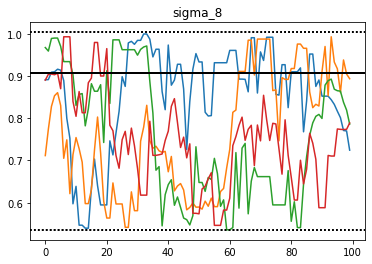

In [29]:
for k in range(ndim):
    plt.figure()
    pname = param_names[k]
    #for j in range(nwalkers):
    for j in range(4):
        plt.title(pname)
        plt.plot(chain_dset[j,:,k], alpha=1)
        low, high = emu.get_param_bounds(pname)
        plt.axhline(low, ls=':', color='k')
        plt.axhline(high, ls=':', color='k')
        plt.axhline(true_values[k], ls='-', lw=2, color='k')

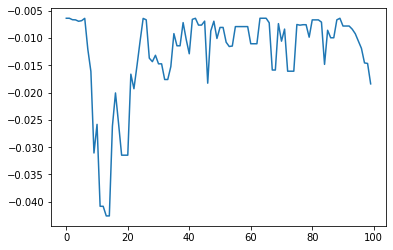

In [30]:
plt.figure()
#for j in range(nwalkers):
for j in range(1):
    plt.plot(lnprob_dset[j,:], alpha=1)

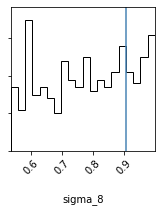

In [31]:
chain = np.array(chain_dset)
fig = corner.corner(chain.reshape(-1, chain.shape[-1]), labels=param_names, truths=true_values)

In [11]:
f.close()

### Read in wp chain

In [3]:
statistic = 'wp'
traintag = '_nonolap'
testtag = '_mean_test0'
errtag = '_100hod_test0'
tag = '_log_kM32ExpConst2_100hod'

gptag = traintag + errtag + tag
res_dir = '../../clust/results_{}/'.format(statistic)
gperr = np.loadtxt(res_dir+"{}_error{}.dat".format(statistic, errtag))
print(gperr)

[0.01416906 0.01528486 0.01859979 0.02408494 0.02566941 0.01650546
 0.01658491 0.0237413  0.05135452]


In [12]:
# chaintag = 'wp_c3h3_omegam_sigma8_med'
chaintag = 'wp_c4h0_allcosmo_long'
chain_fn = f'../chains/chains_{chaintag}.h5'
fw = h5py.File(chain_fn, 'r')

In [13]:
print(fw)
print(fw.keys())

<HDF5 file "chains_wp_c4h0_allcosmo_long.h5" (mode r)>
<KeysViewHDF5 ['chain', 'lnprob']>


In [14]:
chain_dset = fw['chain']
lnprob_dset = fw['lnprob']
param_names = fw.attrs['param_names']
true_values = fw.attrs['true_values']
nwalkers, nchain, ndim = chain_dset.shape

In [15]:
fw.attrs['nhod']

100

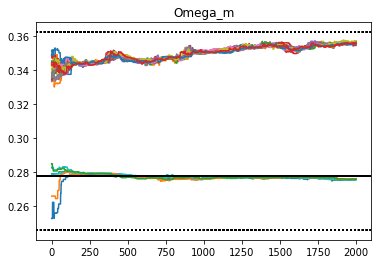

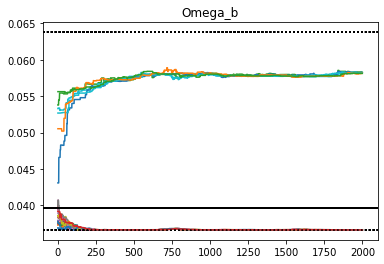

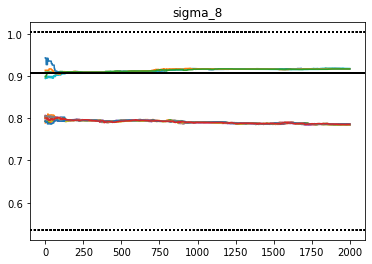

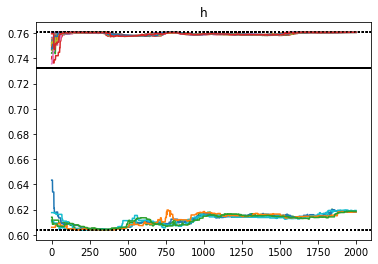

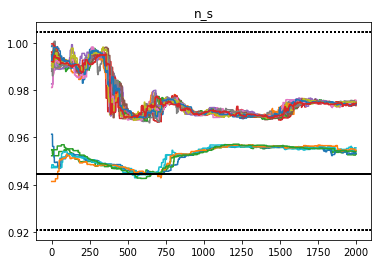

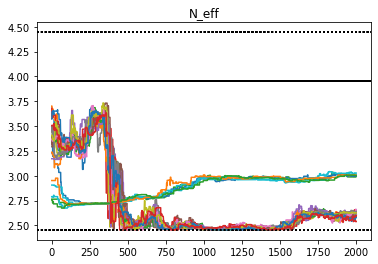

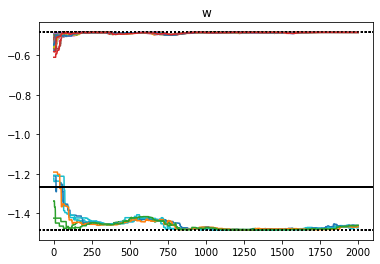

In [16]:
for k in range(ndim):
    plt.figure()
    pname = param_names[k]
    for j in range(nwalkers):
    #\for j in range(4):
        plt.title(pname)
        plt.plot(chain_dset[j,:,k], alpha=1)
        low, high = emu.get_param_bounds(pname)
        plt.axhline(low, ls=':', color='k')
        plt.axhline(high, ls=':', color='k')
        plt.axhline(true_values[k], ls='-', lw=2, color='k')

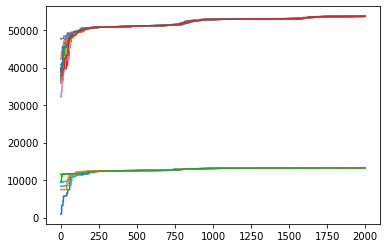

In [17]:
plt.figure()
for j in range(nwalkers):
    plt.plot(lnprob_dset[j,:], alpha=1)

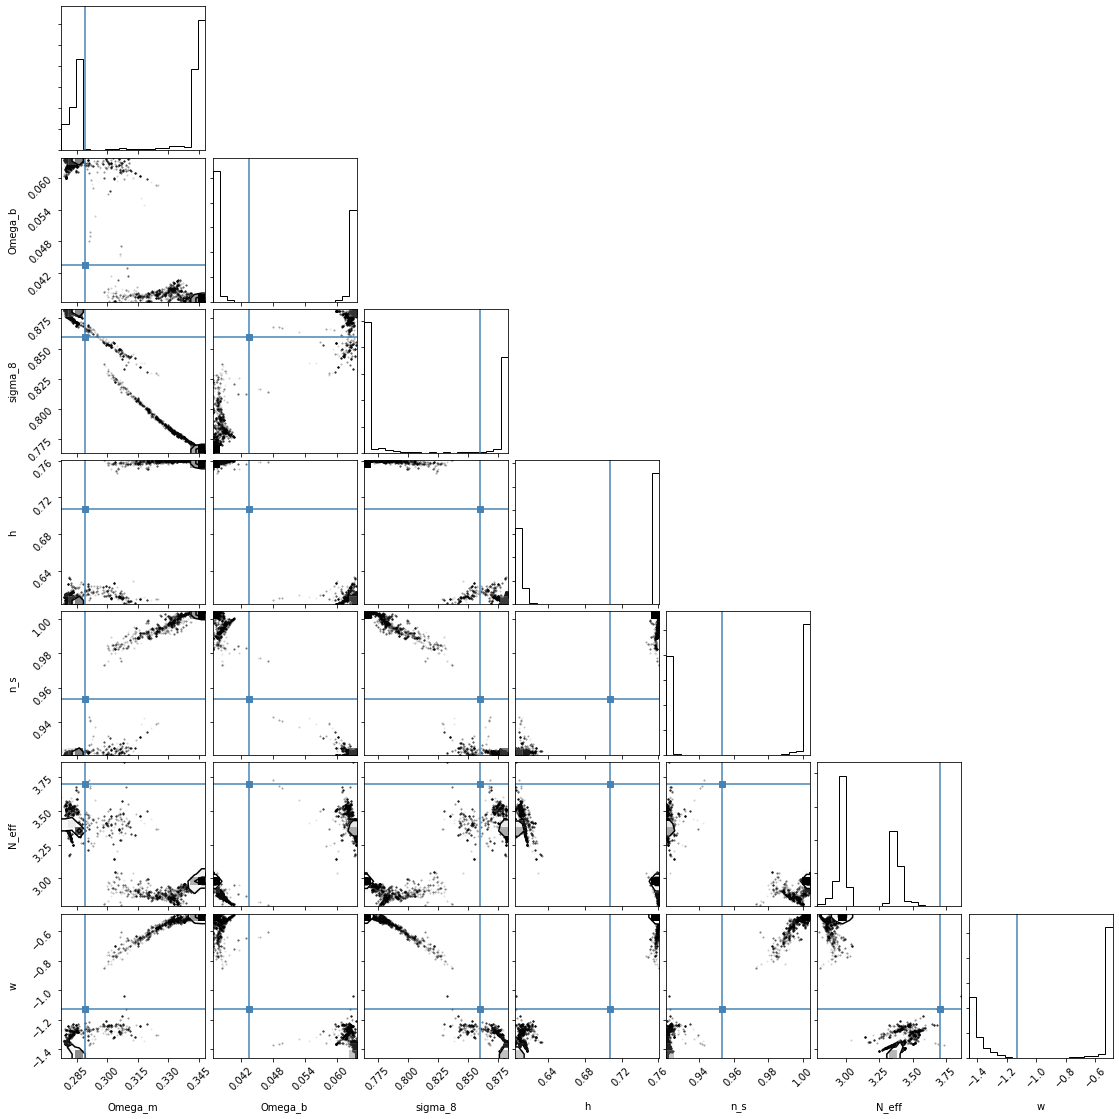

In [10]:
chain = np.array(chain_dset)
fig = corner.corner(chain.reshape(-1, chain.shape[-1]), labels=param_names, truths=true_values)

In [11]:
fw.close()

In [3]:
statistic = 'wp'
traintag = '_nonolap'
testtag = '_mean_test0'
errtag = '_100hod_test0'
tag = '_log_kM32ExpConst2_100hod'

gptag = traintag + errtag + tag
res_dir = '../../clust/results_{}/'.format(statistic)
gperr = np.loadtxt(res_dir+"{}_error{}.dat".format(statistic, errtag))
print(gperr)

[0.01416906 0.01528486 0.01859979 0.02408494 0.02566941 0.01650546
 0.01658491 0.0237413  0.05135452]


In [4]:
# chaintag = 'wp_c3h3_omegam_sigma8_med'
chaintag = 'wp_c3h3_omegam_long'
chain_fn = f'../chains/chains_{chaintag}.h5'
fw = h5py.File(chain_fn, 'r')

In [5]:
chain_dset = fw['chain']
lnprob_dset = fw['lnprob']
param_names = fw.attrs['param_names']
true_values = fw.attrs['true_values']
nwalkers, nchain, ndim = chain_dset.shape

Text(0.5, 0, 'step')

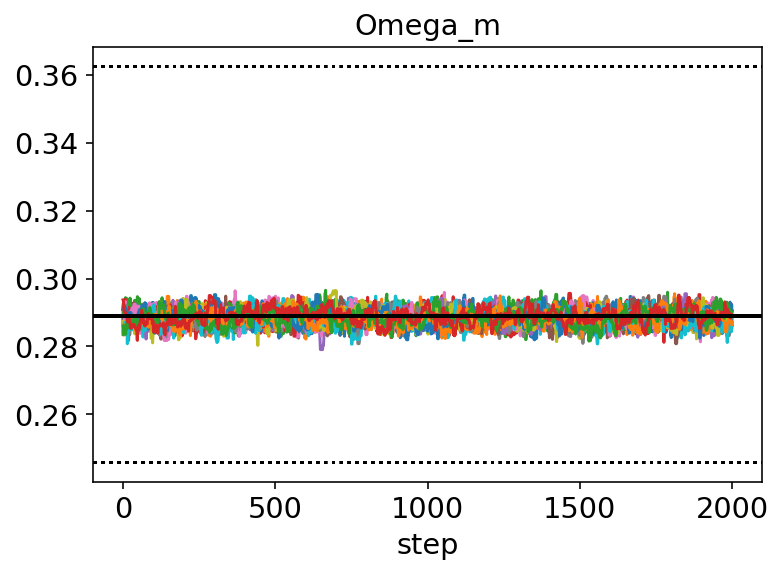

In [6]:
for k in range(ndim):
    plt.figure()
    pname = param_names[k]
    for j in range(nwalkers):
    #\for j in range(4):
        plt.title(pname)
        plt.plot(chain_dset[j,:,k], alpha=1)
        low, high = emu.get_param_bounds(pname)
        plt.axhline(low, ls=':', color='k')
        plt.axhline(high, ls=':', color='k')
        plt.axhline(true_values[k], ls='-', lw=2, color='k')
plt.xlabel('step')

Text(0.5, 0, 'step')

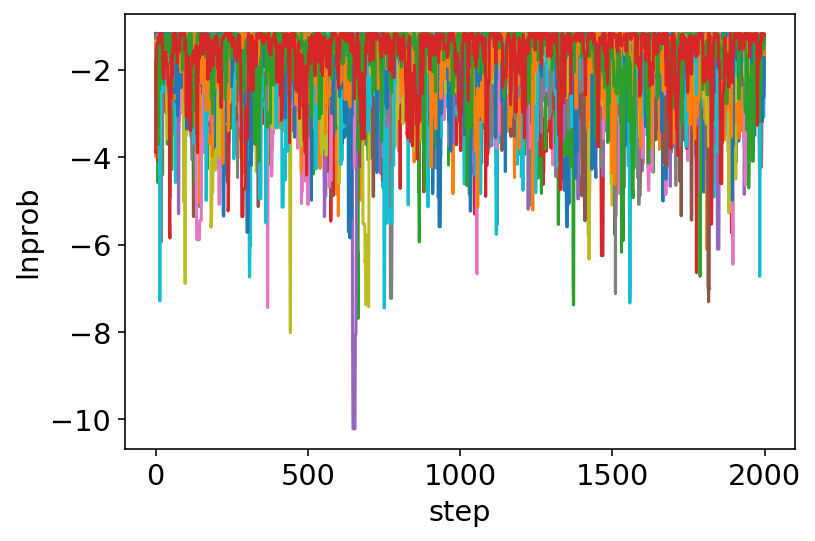

In [7]:
plt.figure()
for j in range(nwalkers):
    plt.plot(lnprob_dset[j,:], alpha=1)
plt.ylabel('lnprob')
plt.xlabel('step')

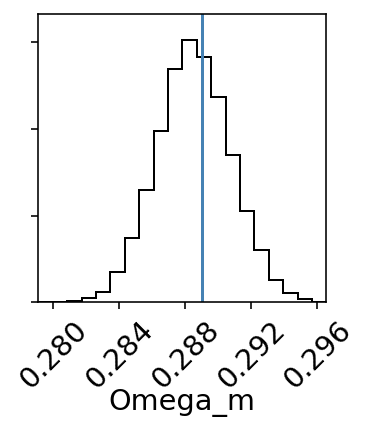

In [8]:
chain = np.array(chain_dset)
fig = corner.corner(chain.reshape(-1, chain.shape[-1]), labels=param_names, truths=true_values)

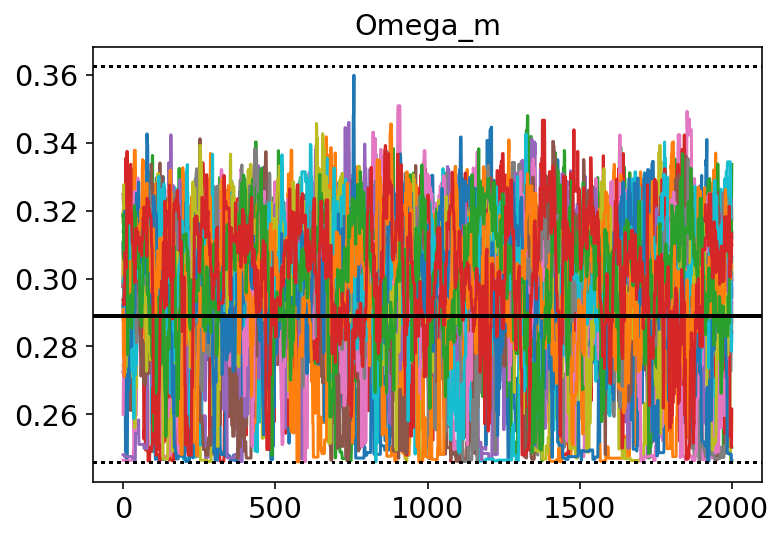

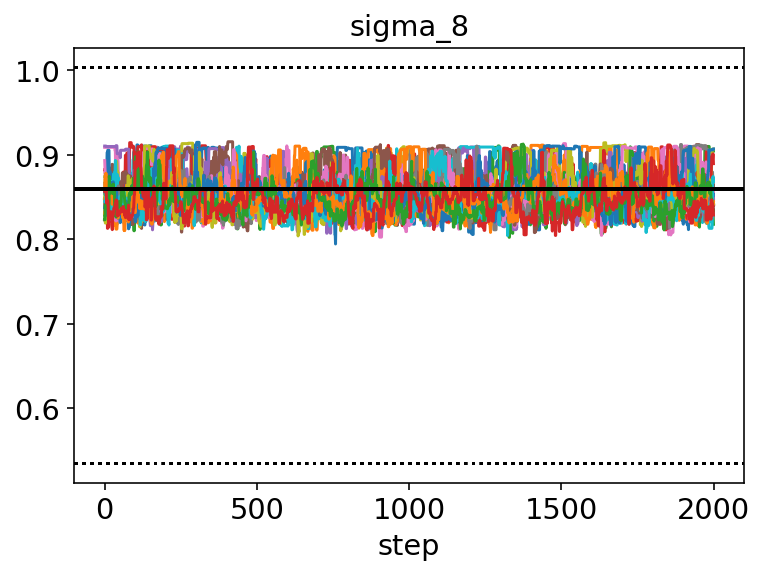

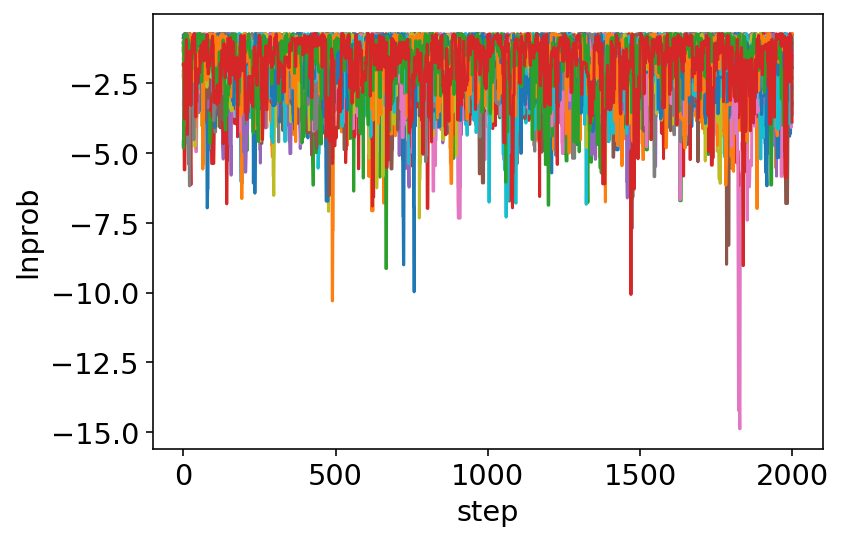

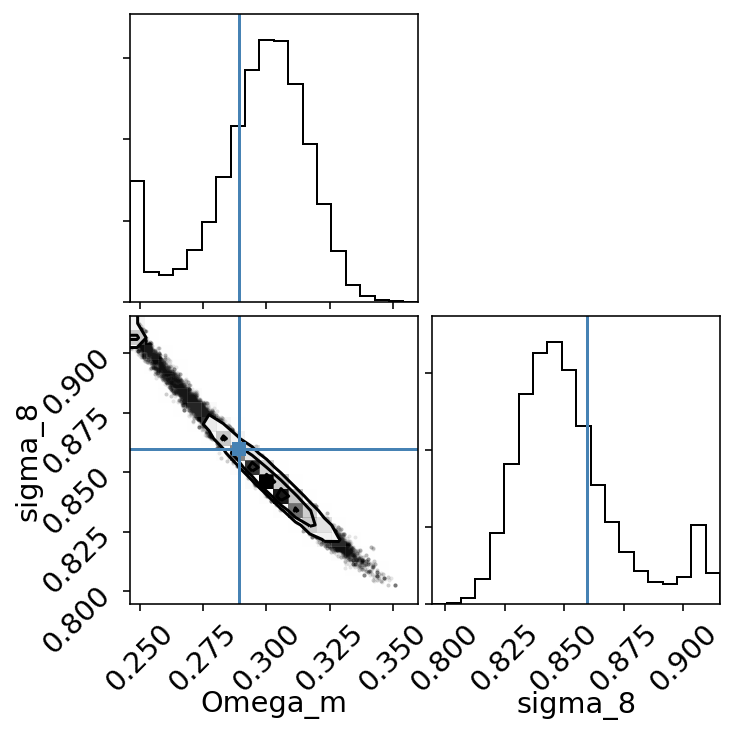

In [16]:
# chaintag = 'wp_c3h3_omegam_sigma8_med'
chaintag = 'wp_c3h3_omegam_sigma8_long'
chain_fn = f'../chains/chains_{chaintag}.h5'
fw = h5py.File(chain_fn, 'r')

chain_dset = fw['chain']
lnprob_dset = fw['lnprob']
param_names = fw.attrs['param_names']
true_values = fw.attrs['true_values']
nwalkers, nchain, ndim = chain_dset.shape

for k in range(ndim):
    plt.figure()
    pname = param_names[k]
    for j in range(nwalkers):
    #\for j in range(4):
        plt.title(pname)
        plt.plot(chain_dset[j,:,k], alpha=1)
        low, high = emu.get_param_bounds(pname)
        plt.axhline(low, ls=':', color='k')
        plt.axhline(high, ls=':', color='k')
        plt.axhline(true_values[k], ls='-', lw=2, color='k')
plt.xlabel('step')


plt.figure()
for j in range(nwalkers):
    plt.plot(lnprob_dset[j,:], alpha=1)
plt.ylabel('lnprob')
plt.xlabel('step')

chain = np.array(chain_dset)
fig = corner.corner(chain.reshape(-1, chain.shape[-1]), labels=param_names, truths=true_values)

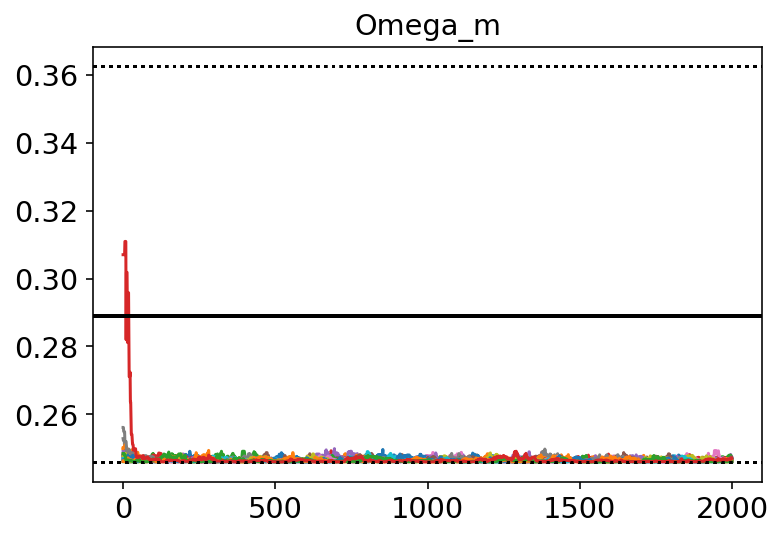

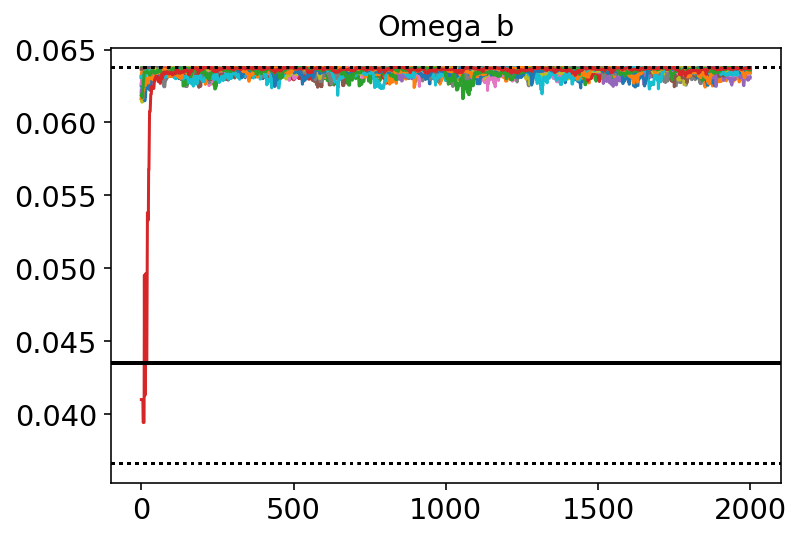

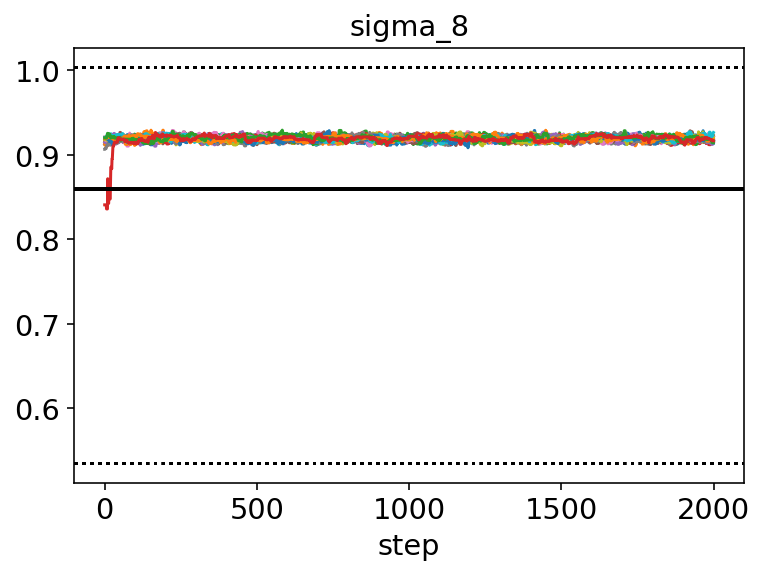

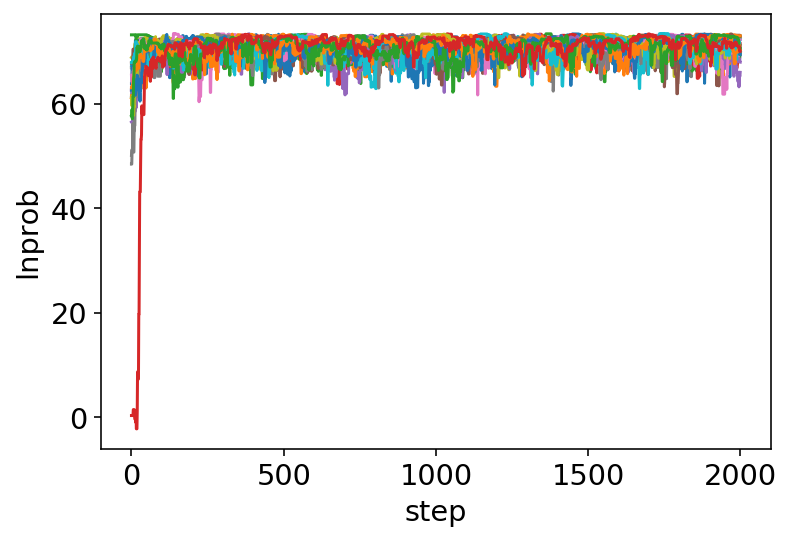

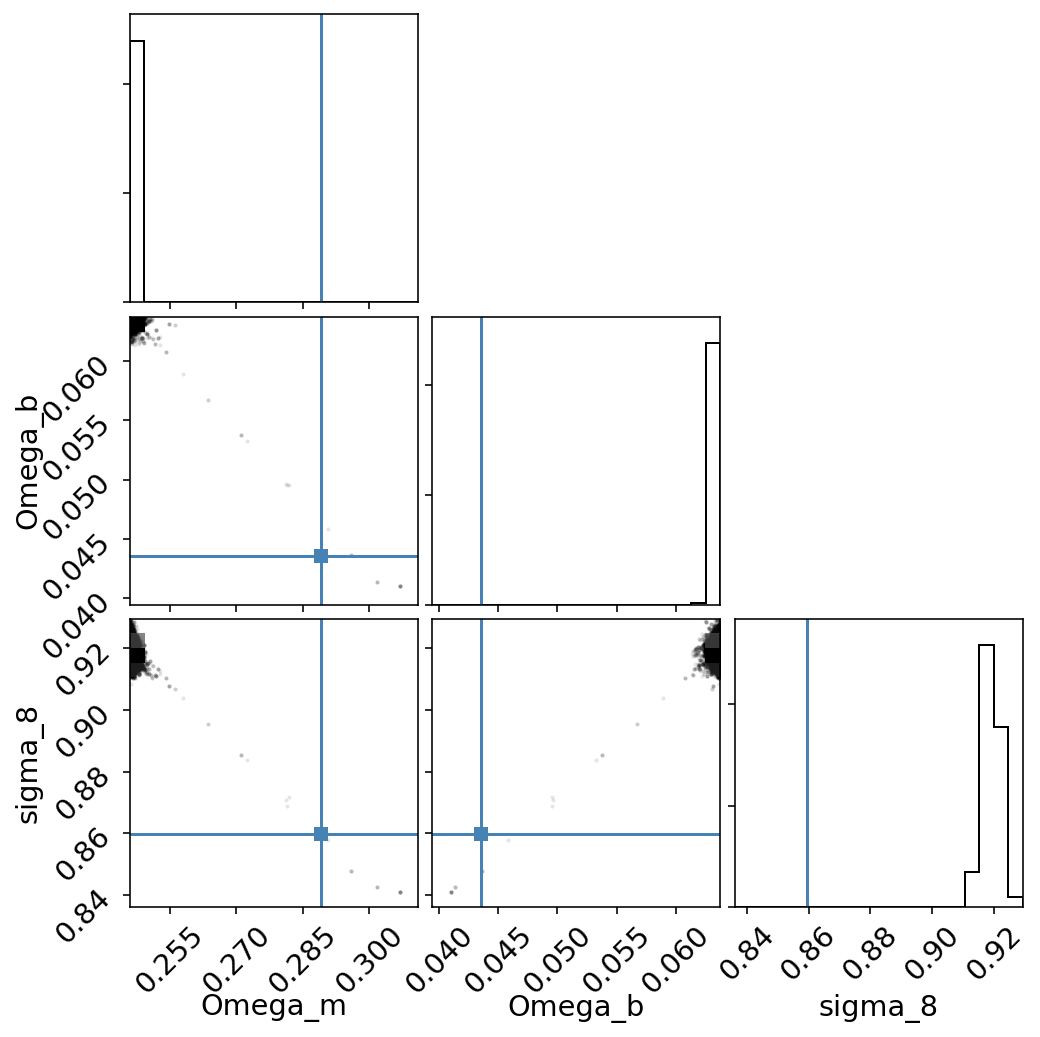

In [5]:
chaintag = 'wp_c3h3_omegam_omegab_sigma8_long'
#chaintag = 'wp_c3h3_allcosmo_long'
chain_fn = f'../chains/chains_{chaintag}.h5'
fw = h5py.File(chain_fn, 'r')

chain_dset = fw['chain']
lnprob_dset = fw['lnprob']
param_names = fw.attrs['param_names']
true_values = fw.attrs['true_values']
nwalkers, nchain, ndim = chain_dset.shape

for k in range(ndim):
    plt.figure()
    pname = param_names[k]
    for j in range(nwalkers):
    #\for j in range(4):
        plt.title(pname)
        plt.plot(chain_dset[j,:,k], alpha=1)
        low, high = emu.get_param_bounds(pname)
        plt.axhline(low, ls=':', color='k')
        plt.axhline(high, ls=':', color='k')
        plt.axhline(true_values[k], ls='-', lw=2, color='k')
plt.xlabel('step')

plt.figure()
for j in range(nwalkers):
    plt.plot(lnprob_dset[j,:], alpha=1)
plt.ylabel('lnprob')
plt.xlabel('step')

chain = np.array(chain_dset)
fig = corner.corner(chain.reshape(-1, chain.shape[-1]), labels=param_names, truths=true_values)

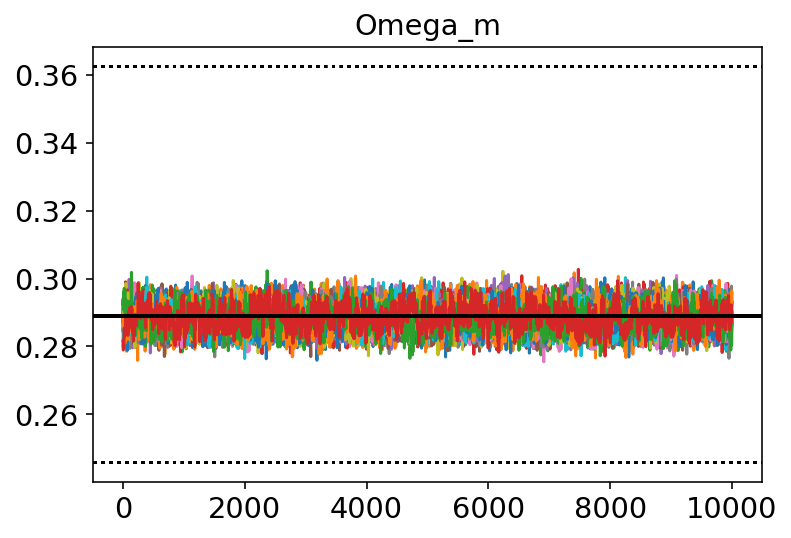

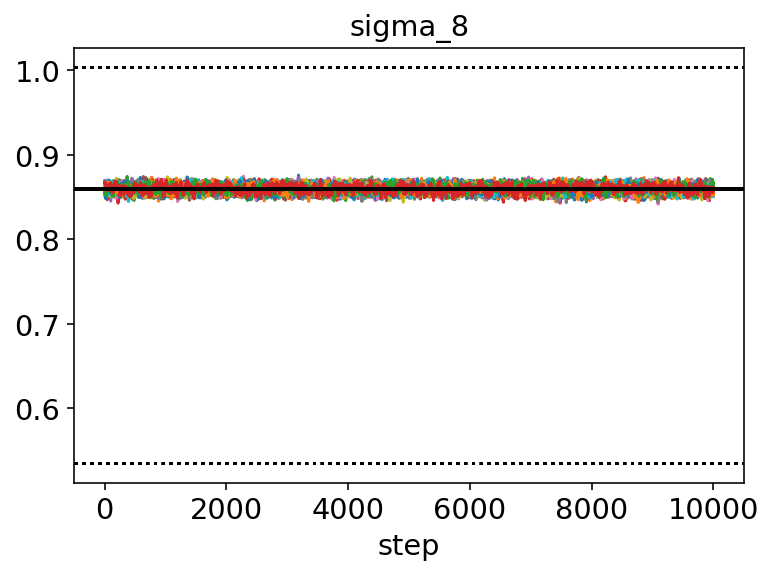

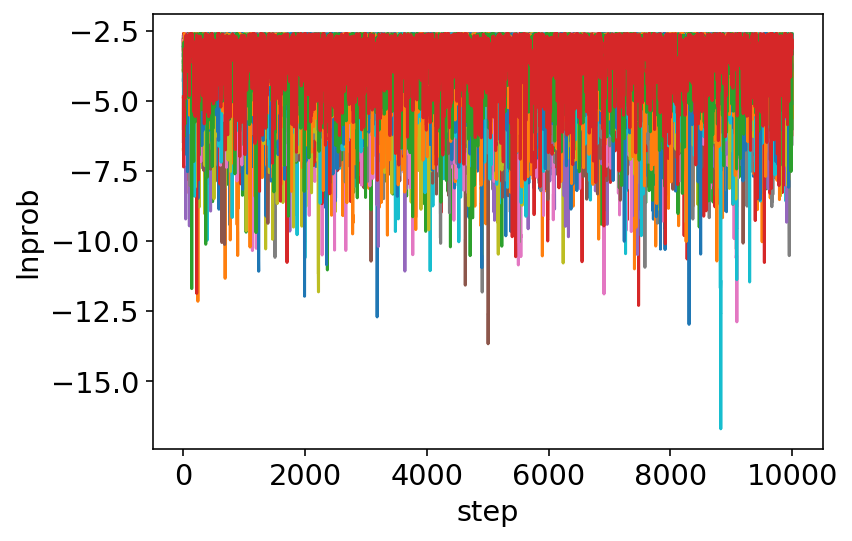

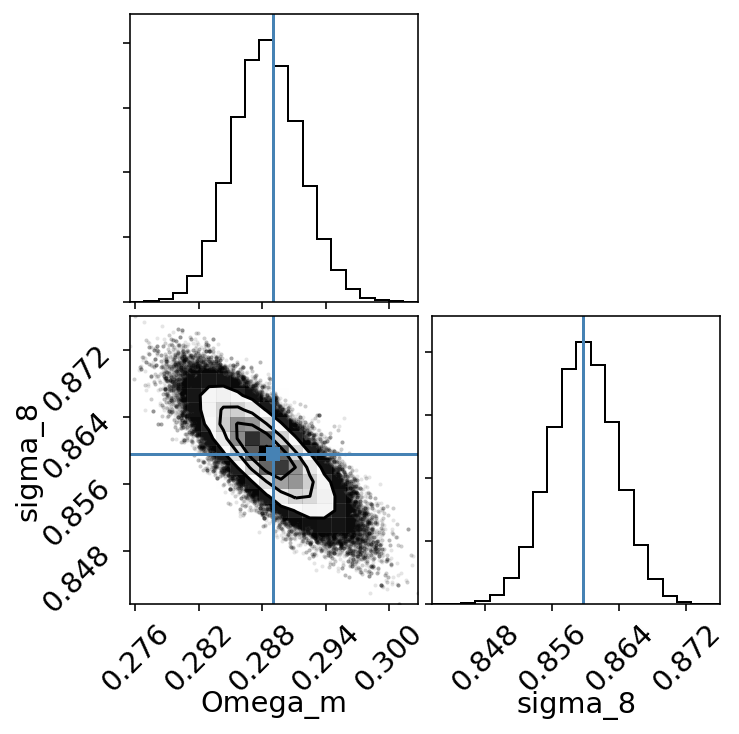

In [7]:
#chaintag = 'wp_c3h3_omegam_omegab_sigma8_med_diag'
chaintag = 'wp_c3h3_omegam_sigma8_xlong_diag'
chain_fn = f'../chains/chains_{chaintag}.h5'
fw = h5py.File(chain_fn, 'r')

chain_dset = fw['chain']
lnprob_dset = fw['lnprob']
param_names = fw.attrs['param_names']
true_values = fw.attrs['true_values']
nwalkers, nchain, ndim = chain_dset.shape

for k in range(ndim):
    plt.figure()
    pname = param_names[k]
    for j in range(nwalkers):
    #\for j in range(4):
        plt.title(pname)
        plt.plot(chain_dset[j,:,k], alpha=1)
        low, high = emu.get_param_bounds(pname)
        plt.axhline(low, ls=':', color='k')
        plt.axhline(high, ls=':', color='k')
        plt.axhline(true_values[k], ls='-', lw=2, color='k')
plt.xlabel('step')

plt.figure()
for j in range(nwalkers):
    plt.plot(lnprob_dset[j,:], alpha=1)
plt.ylabel('lnprob')
plt.xlabel('step')

chain = np.array(chain_dset)
fig = corner.corner(chain.reshape(-1, chain.shape[-1]), labels=param_names, truths=true_values)

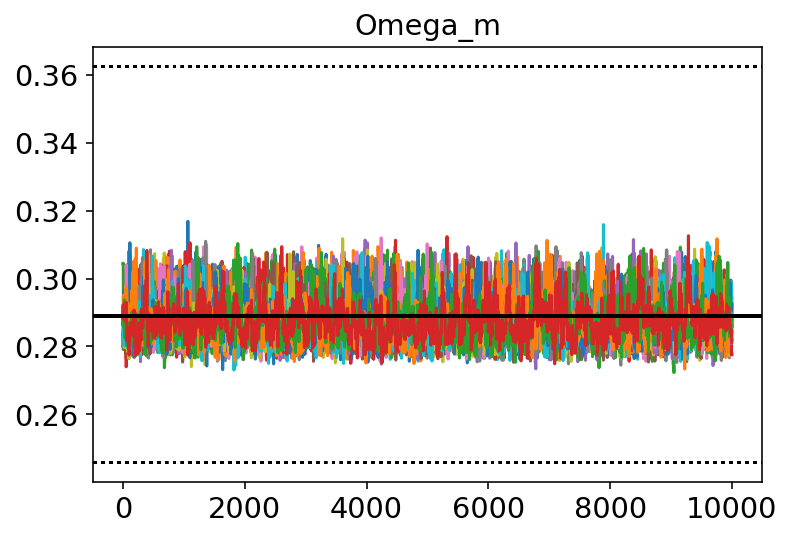

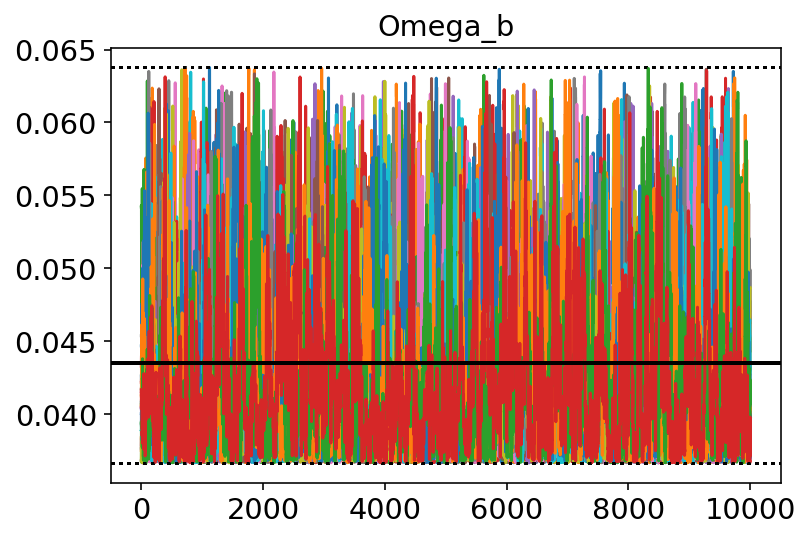

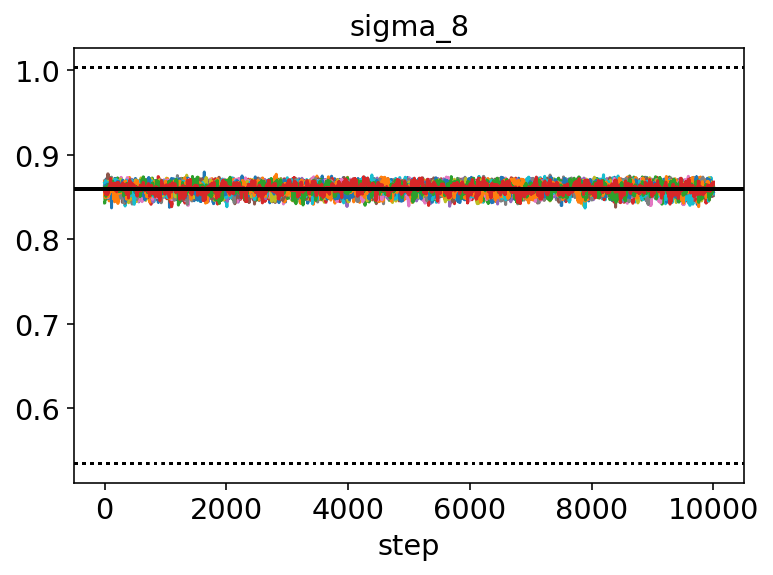

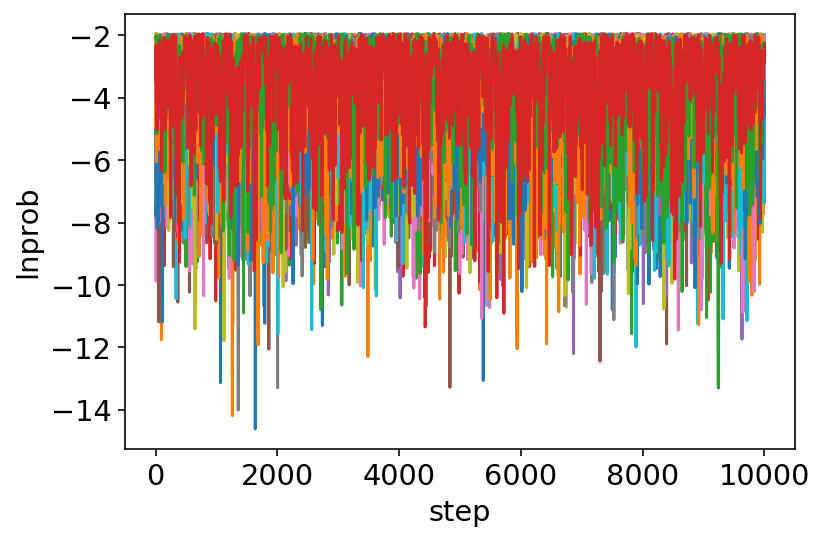

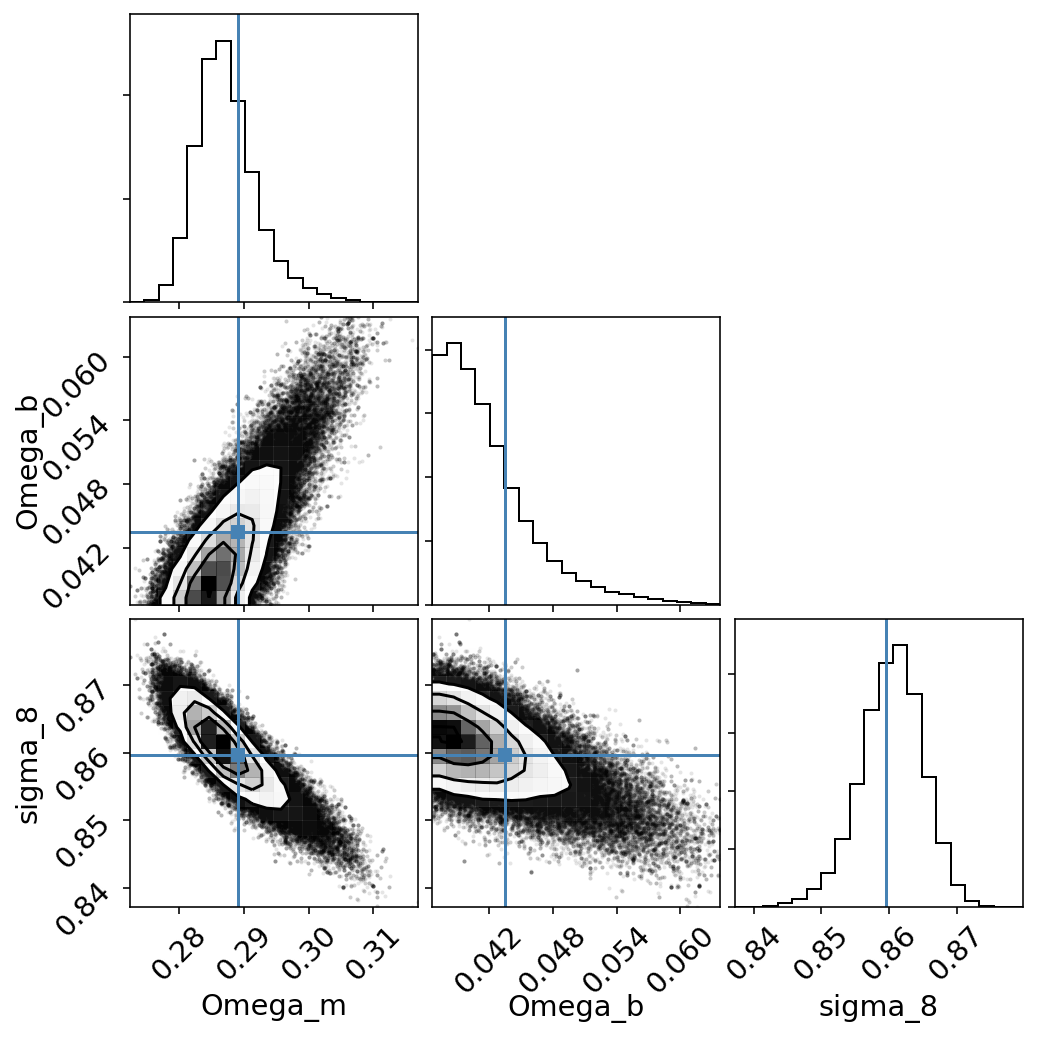

In [3]:
chaintag = 'wp_c3h3_omegam_omegab_sigma8_xlong_diag'
#chaintag = 'wp_c3h3_allcosmo_long'
chain_fn = f'../chains/chains_{chaintag}.h5'
fw = h5py.File(chain_fn, 'r')

chain_dset = fw['chain']
lnprob_dset = fw['lnprob']
param_names = fw.attrs['param_names']
true_values = fw.attrs['true_values']
nwalkers, nchain, ndim = chain_dset.shape

for k in range(ndim):
    plt.figure()
    pname = param_names[k]
    for j in range(nwalkers):
    #\for j in range(4):
        plt.title(pname)
        plt.plot(chain_dset[j,:,k], alpha=1)
        low, high = emu.get_param_bounds(pname)
        plt.axhline(low, ls=':', color='k')
        plt.axhline(high, ls=':', color='k')
        plt.axhline(true_values[k], ls='-', lw=2, color='k')
plt.xlabel('step')

plt.figure()
for j in range(nwalkers):
    plt.plot(lnprob_dset[j,:], alpha=1)
plt.ylabel('lnprob')
plt.xlabel('step')

chain = np.array(chain_dset)
fig = corner.corner(chain.reshape(-1, chain.shape[-1]), labels=param_names, truths=true_values)

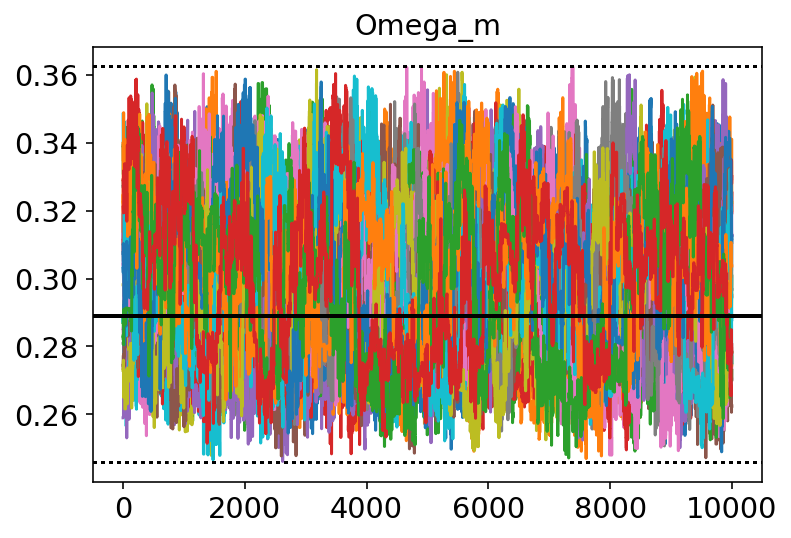

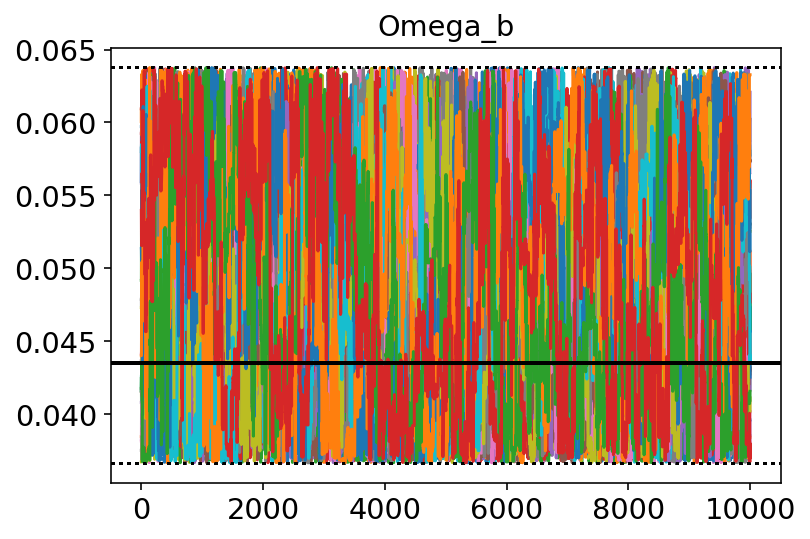

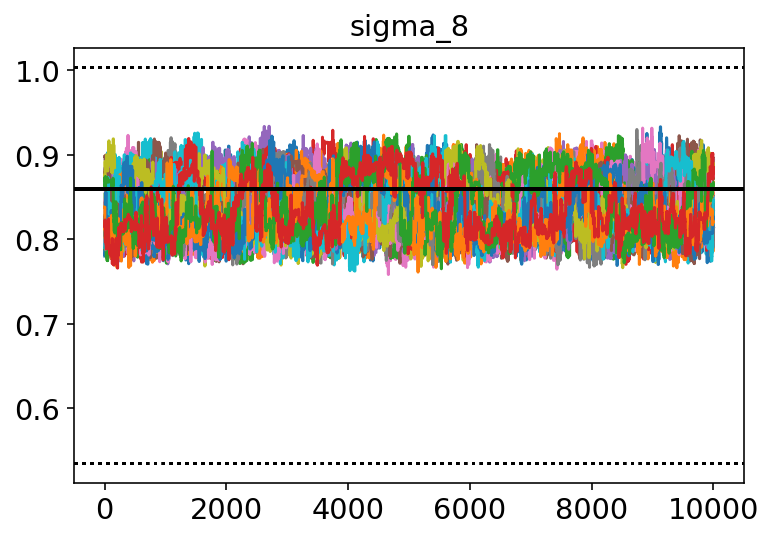

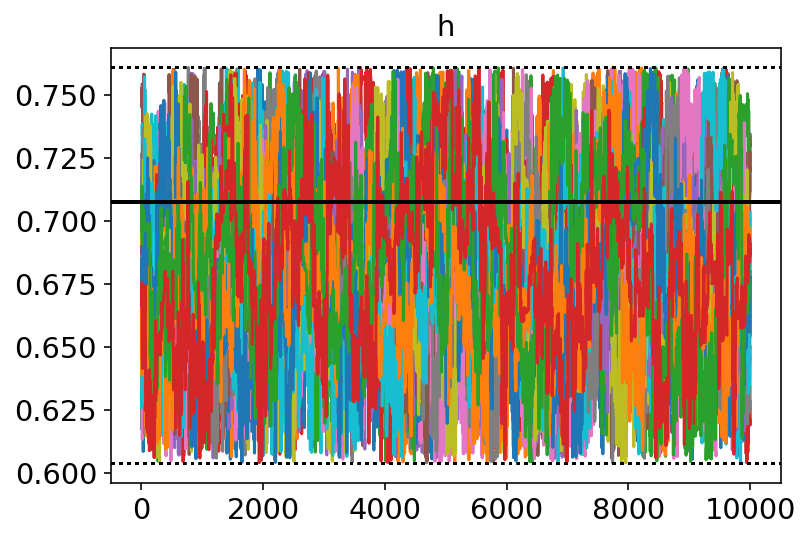

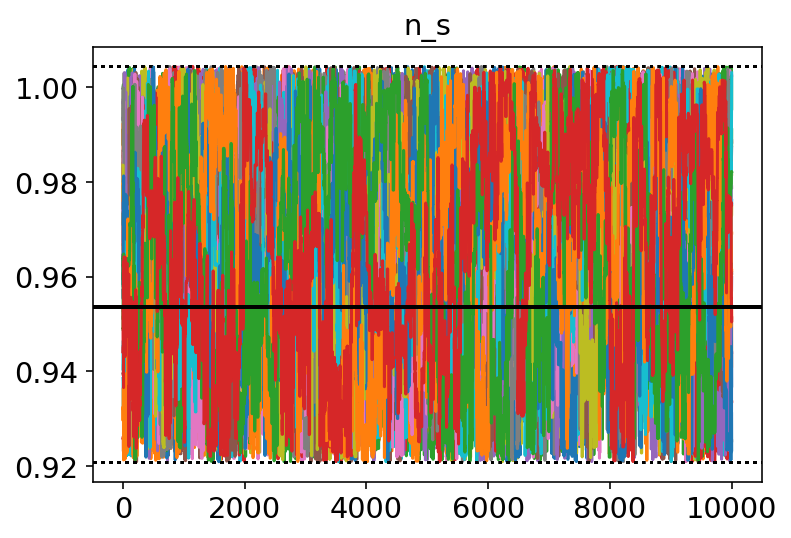

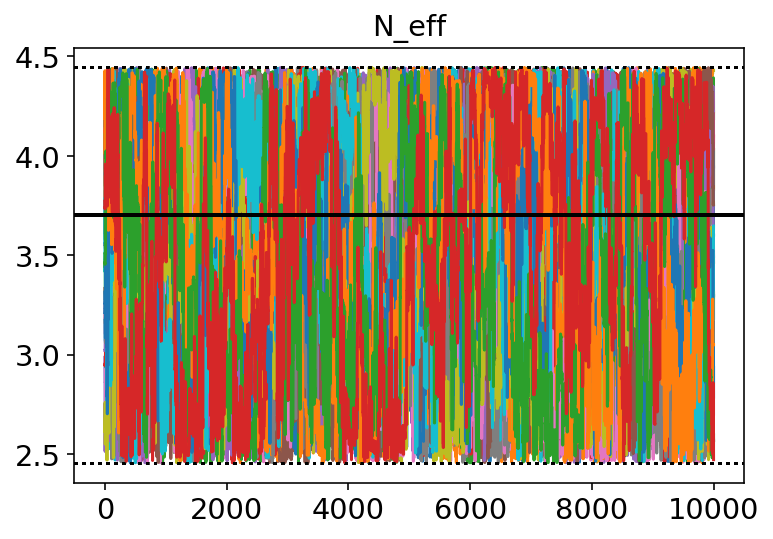

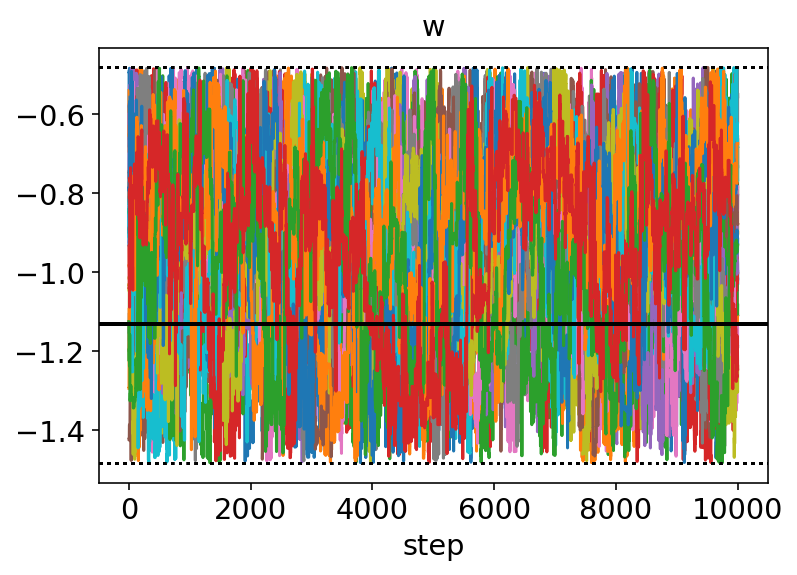

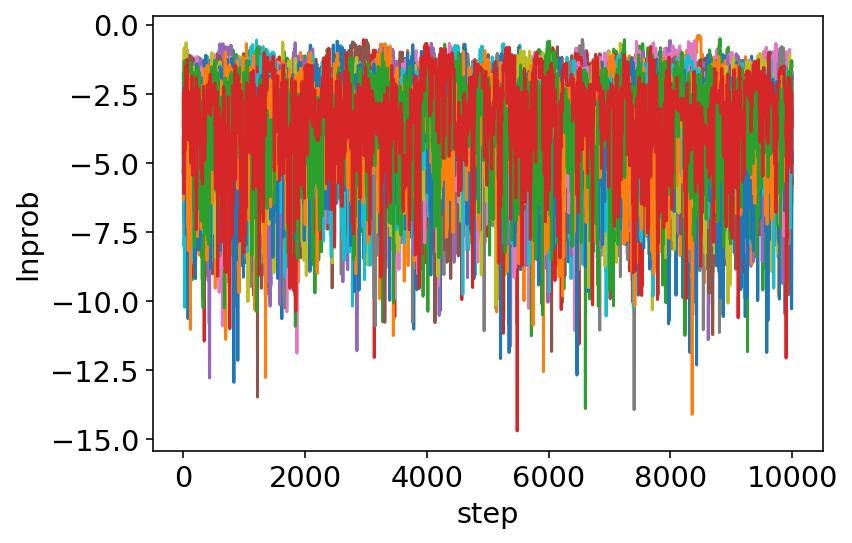

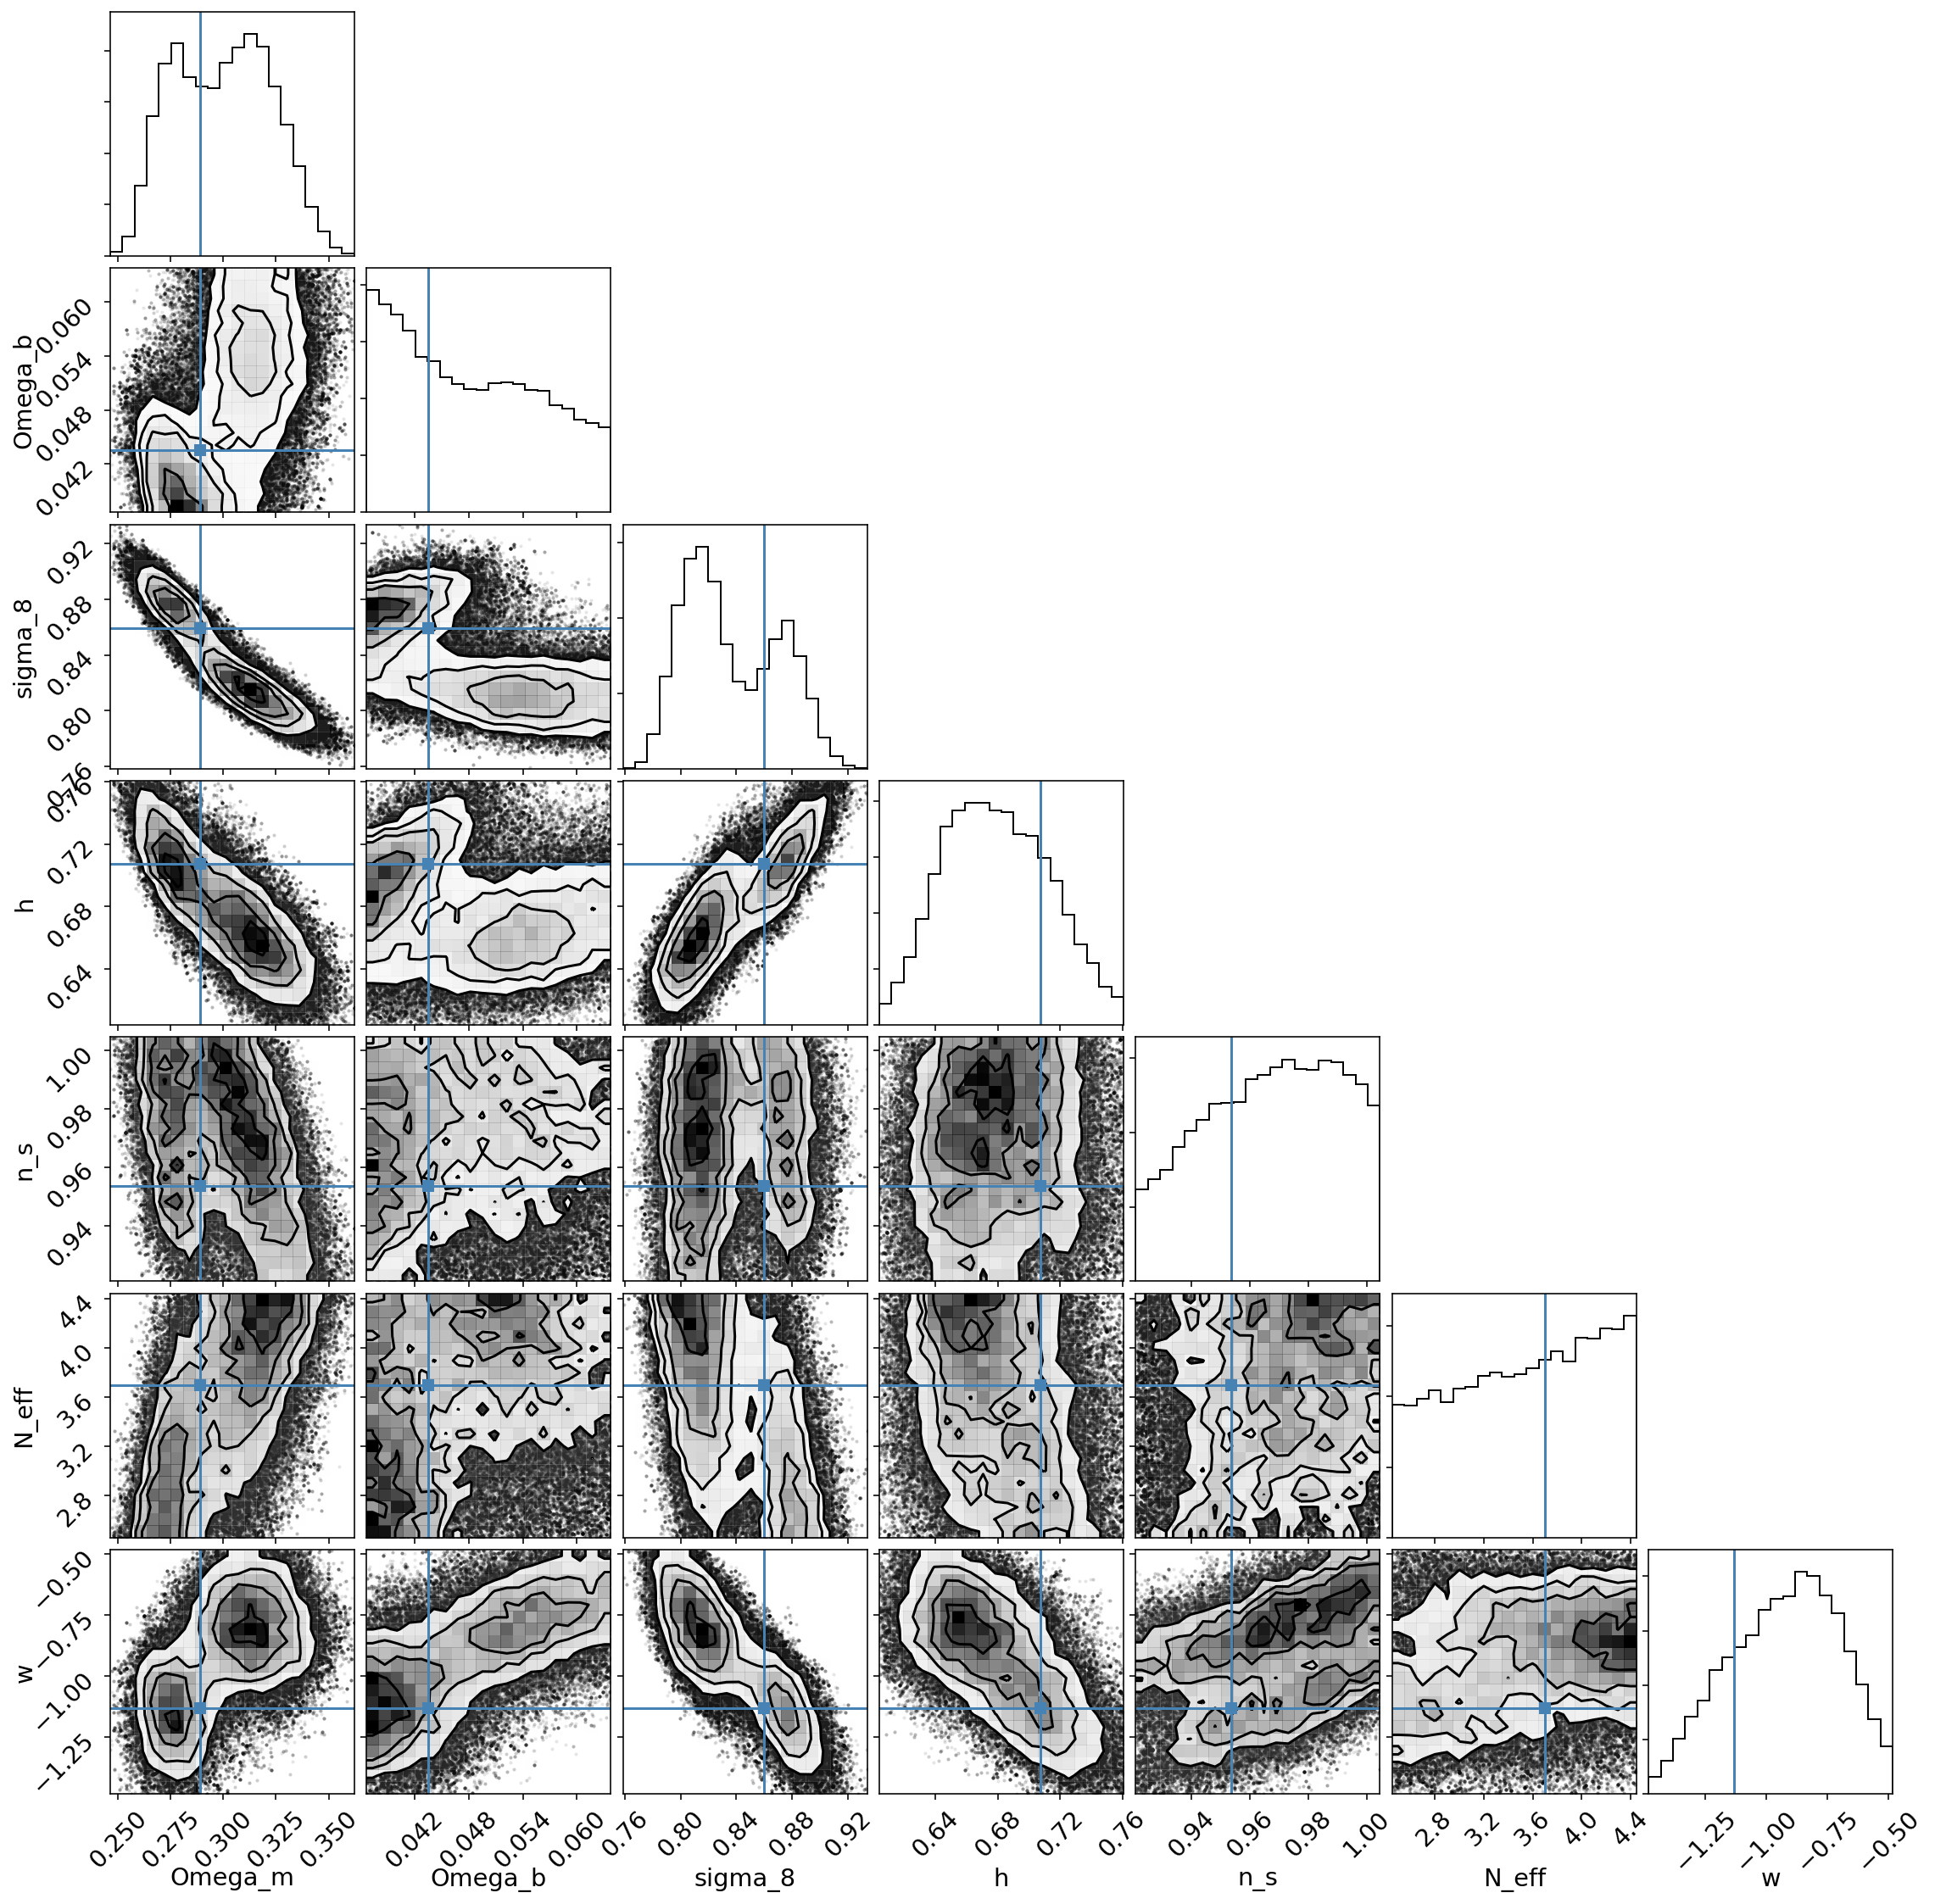

In [4]:
#chaintag = 'wp_c3h3_omegam_omegab_sigma8_med_diag'
chaintag = 'wp_c3h3_allcosmo_xlong_diag'
chain_fn = f'../chains/chains_{chaintag}.h5'
fw = h5py.File(chain_fn, 'r')

chain_dset = fw['chain']
lnprob_dset = fw['lnprob']
param_names = fw.attrs['param_names']
true_values = fw.attrs['true_values']
nwalkers, nchain, ndim = chain_dset.shape

for k in range(ndim):
    plt.figure()
    pname = param_names[k]
    for j in range(nwalkers):
    #\for j in range(4):
        plt.title(pname)
        plt.plot(chain_dset[j,:,k], alpha=1)
        low, high = emu.get_param_bounds(pname)
        plt.axhline(low, ls=':', color='k')
        plt.axhline(high, ls=':', color='k')
        plt.axhline(true_values[k], ls='-', lw=2, color='k')
plt.xlabel('step')

plt.figure()
for j in range(nwalkers):
    plt.plot(lnprob_dset[j,:], alpha=1)
plt.ylabel('lnprob')
plt.xlabel('step')

chain = np.array(chain_dset)
fig = corner.corner(chain.reshape(-1, chain.shape[-1]), labels=param_names, truths=true_values)

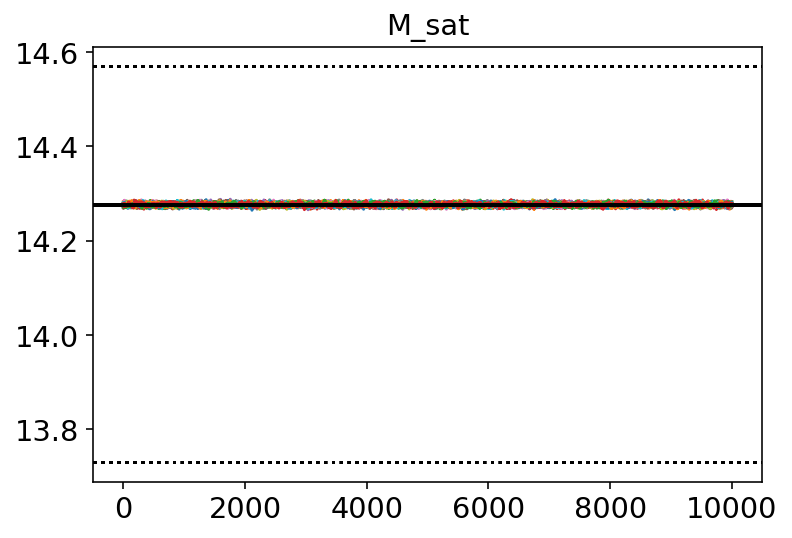

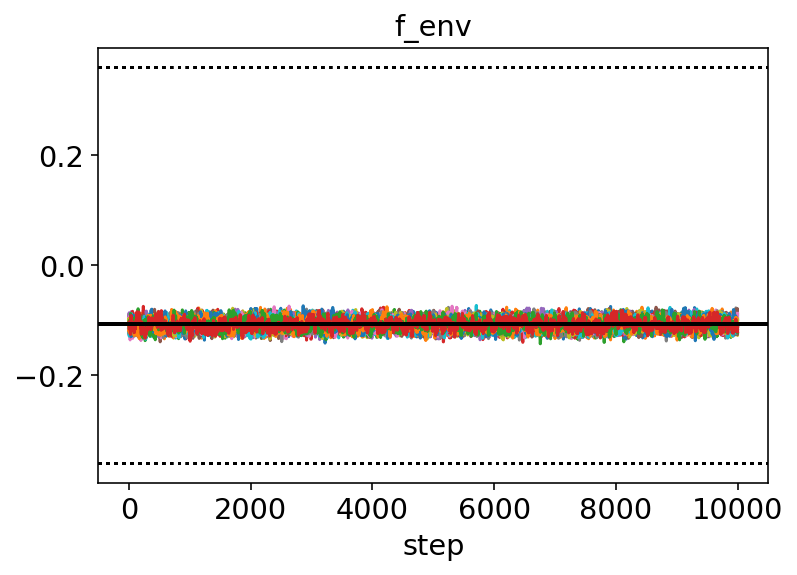

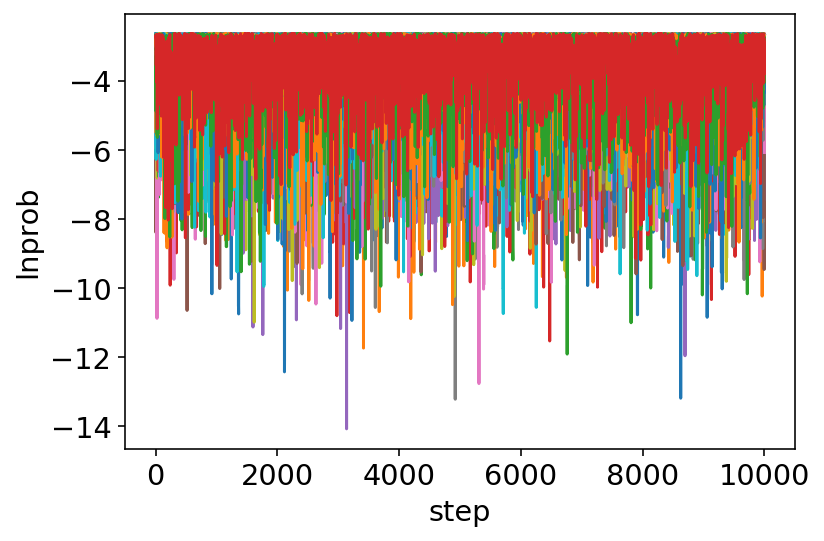

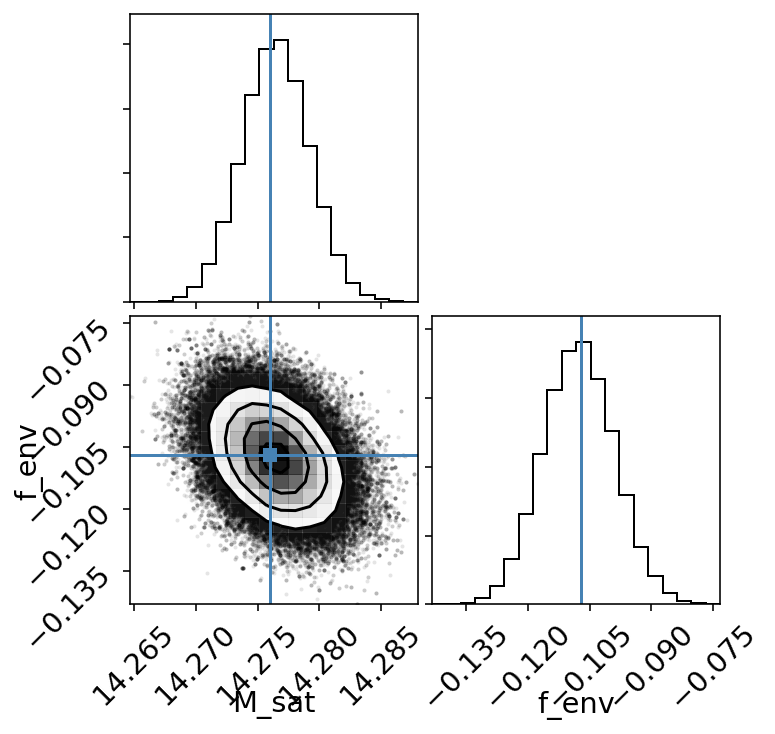

In [6]:
#chaintag = 'wp_c3h3_omegam_omegab_sigma8_med_diag'
chaintag = 'wp_c3h3_Msat_fenv_xlong_diag'
chain_fn = f'../chains/chains_{chaintag}.h5'
fw = h5py.File(chain_fn, 'r')

chain_dset = fw['chain']
lnprob_dset = fw['lnprob']
param_names = fw.attrs['param_names']
true_values = fw.attrs['true_values']
nwalkers, nchain, ndim = chain_dset.shape

for k in range(ndim):
    plt.figure()
    pname = param_names[k]
    for j in range(nwalkers):
    #\for j in range(4):
        plt.title(pname)
        plt.plot(chain_dset[j,:,k], alpha=1)
        low, high = emu.get_param_bounds(pname)
        plt.axhline(low, ls=':', color='k')
        plt.axhline(high, ls=':', color='k')
        plt.axhline(true_values[k], ls='-', lw=2, color='k')
plt.xlabel('step')

plt.figure()
for j in range(nwalkers):
    plt.plot(lnprob_dset[j,:], alpha=1)
plt.ylabel('lnprob')
plt.xlabel('step')

chain = np.array(chain_dset)
fig = corner.corner(chain.reshape(-1, chain.shape[-1]), labels=param_names, truths=true_values)

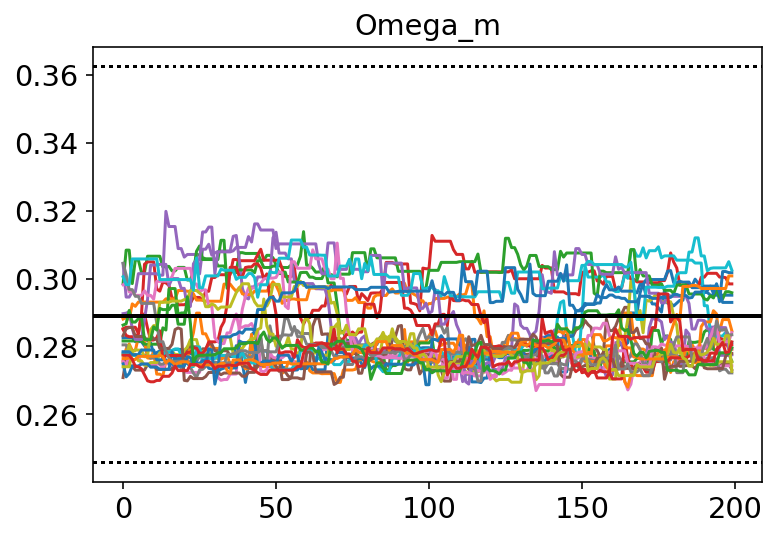

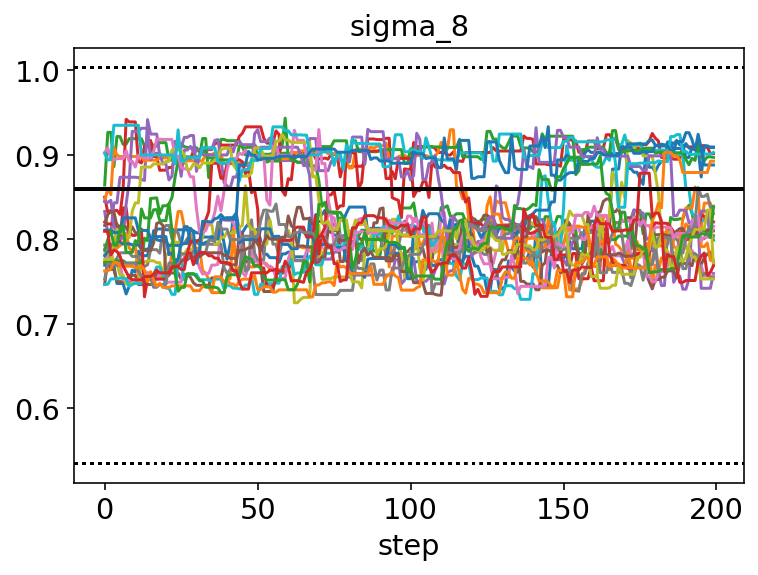

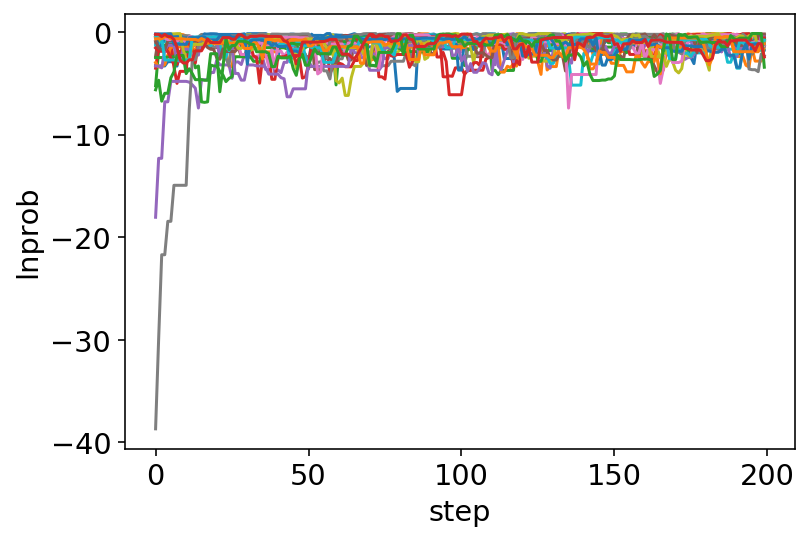

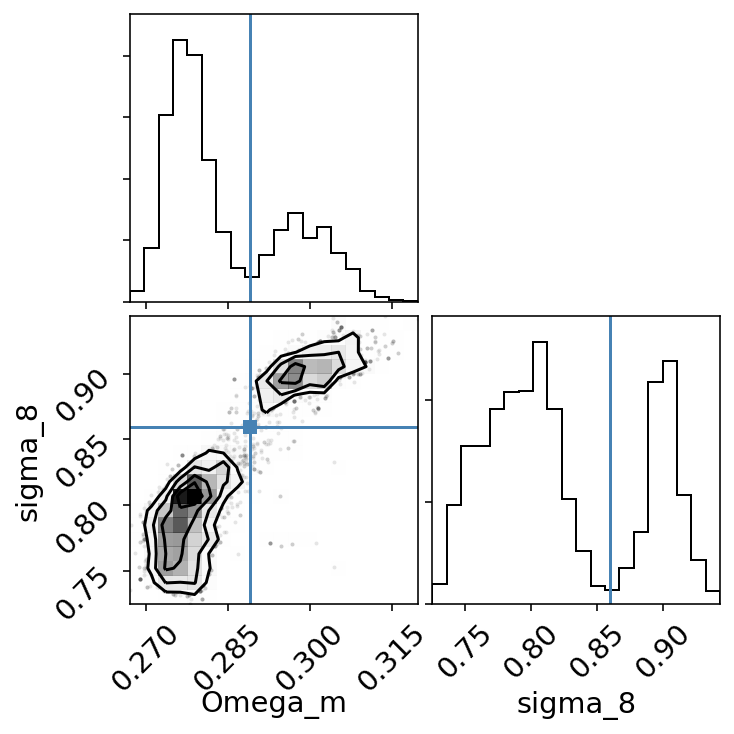

In [8]:
chaintag = 'wp_c3h3_omegam_sigma8_short_covtotal'
#chaintag = 'wp_c3h3_Msat_fenv_xlong_diag'
chain_fn = f'../chains/chains_{chaintag}.h5'
fw = h5py.File(chain_fn, 'r')

chain_dset = fw['chain']
lnprob_dset = fw['lnprob']
param_names = fw.attrs['param_names']
true_values = fw.attrs['true_values']
nwalkers, nchain, ndim = chain_dset.shape

for k in range(ndim):
    plt.figure()
    pname = param_names[k]
    for j in range(nwalkers):
    #\for j in range(4):
        plt.title(pname)
        plt.plot(chain_dset[j,:,k], alpha=1)
        low, high = emu.get_param_bounds(pname)
        plt.axhline(low, ls=':', color='k')
        plt.axhline(high, ls=':', color='k')
        plt.axhline(true_values[k], ls='-', lw=2, color='k')
plt.xlabel('step')

plt.figure()
for j in range(nwalkers):
    plt.plot(lnprob_dset[j,:], alpha=1)
plt.ylabel('lnprob')
plt.xlabel('step')

chain = np.array(chain_dset)
fig = corner.corner(chain.reshape(-1, chain.shape[-1]), labels=param_names, truths=true_values)